<a href="https://colab.research.google.com/github/SagnikRahman/Movie-Recommendation-System/blob/main/MovieRecommendationUsingUnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

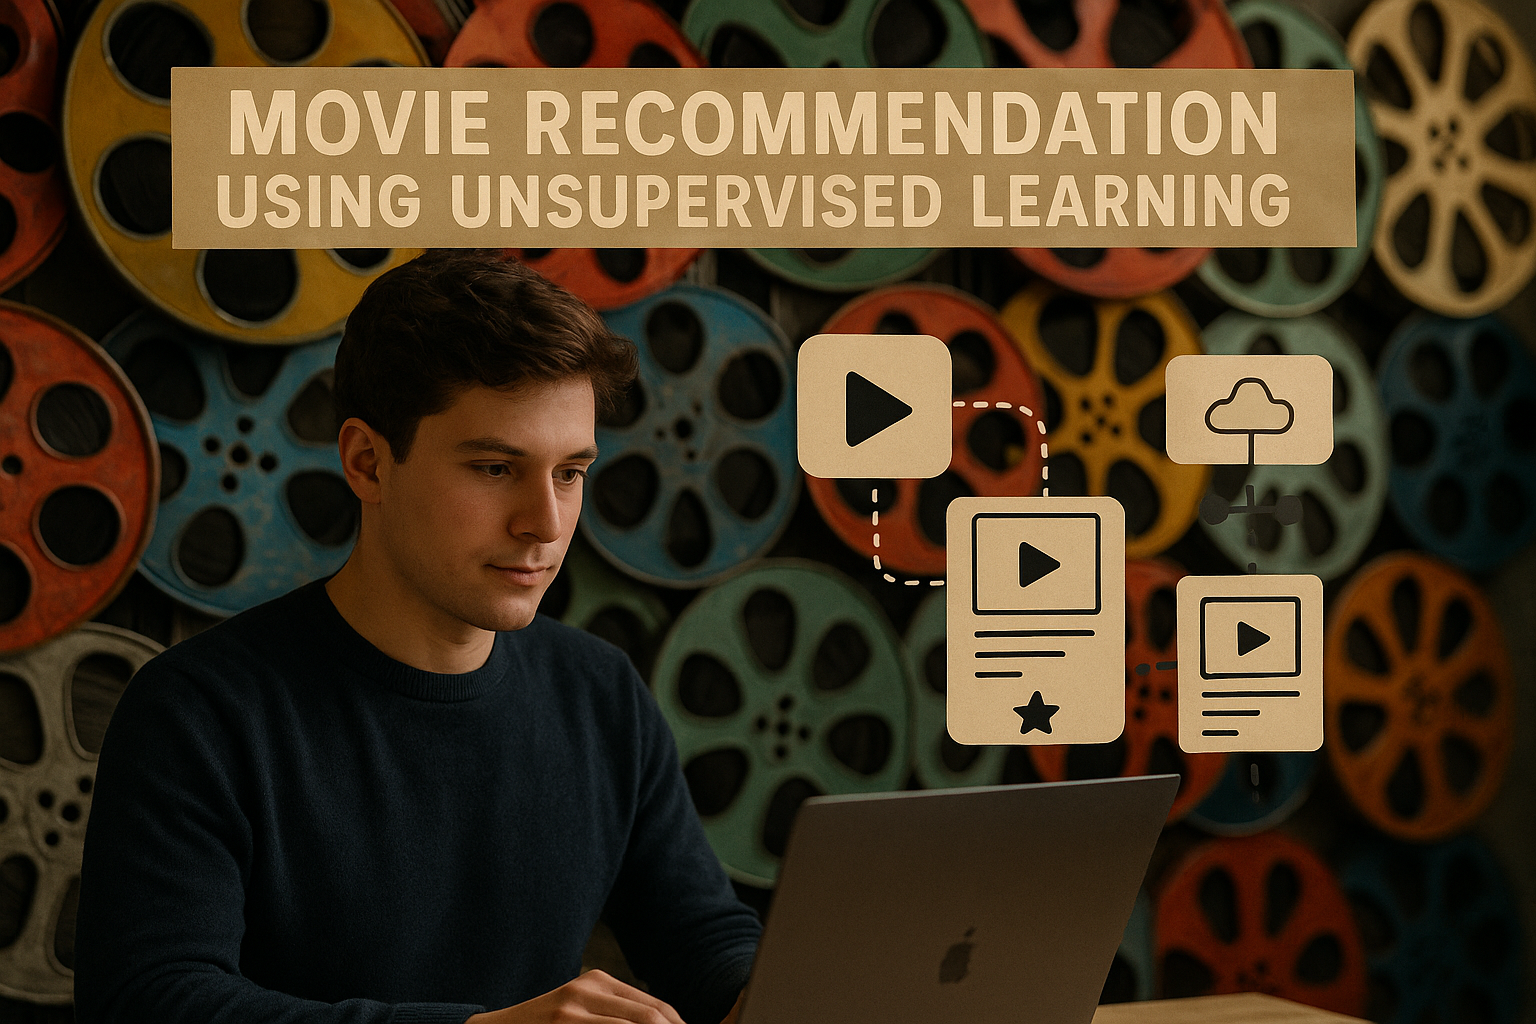

**Introduction**

In today’s digital world, users are overwhelmed with the abundance of movie choices available across various platforms. As a result, deciding what to watch next has become increasingly difficult. Movie Recommendation Systems offer a practical solution to this issue by helping users discover movies tailored to their preferences using data and intelligent algorithms.

This project aims to build a Content-Based Movie Recommendation System that suggests similar movies to a given title using various metadata features such as genre, overview, cast, crew, and keywords. The recommendations are based on the similarity between movies, allowing the system to offer personalized suggestions without the need for explicit user ratings or interaction history.

**Technologies and Tools Used**

This project leverages the following tools and technologies:

*Python:* Core programming language used for data processing and model development

*Pandas:* For data cleaning, exploration, and manipulation of movie metadata

*NumPy:* For numerical operations and efficient array handling

*Scikit-learn:* For feature extraction (e.g., TF-IDF Vectorization) and similarity measurement using cosine similarity

*Natural Language Processing (NLP):* To process and vectorize text data such as movie overviews and keywords

*Jupyter Notebook:* For interactive development and visualization

*Matplotlib / Seaborn (optional):* For data visualization and understanding patterns



**Data Description**

The dataset contains the following features:

1. adult: Indicates whether the movie is for adults (True or False)
2. belongs_to_collection: Collection or franchise the movie belongs to (if any), represented as a dictionary-like string
3. budget: The movie's budget in USD
4. genres: A list of genre objects (each with id and name)
5. homepage: The official website URL of the movie
6. id: Unique identifier for the movie (numeric or string)
7. imdb_id: The IMDb identifier (e.g., tt0114709)
8. original_language: Original language of the movie (e.g., 'en' for English)
9. original_title: Original title before localization
10. overview: A short synopsis of the movie’s plot
11. popularity: Numeric score representing the movie’s popularity
12. poster_path: File path to the movie’s poster image
13. production_companies: List of production companies (as dictionary-like strings)
14. production_countries: List of countries involved in production (dictionary format)
15. release_date: Official release date (YYYY-MM-DD)
16. revenue: Revenue generated by the movie (in USD)
17. runtime: Duration of the movie in minutes
18. spoken_languages: List of spoken languages (as dictionaries)
19. status: Release status of the movie (e.g., Released, Post Production)
20. tagline: Marketing tagline or catchphrase
21. title: Title of the movie (may differ from the original title)
22. video: Indicates if the entry is a video (True or False)
23. vote_average: Average user rating (typically out of 10)
24. vote_count: Total number of votes or ratings received

In [1]:
# Installing neccessary libraries here
! pip install pandas
! pip install numpy
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import ast  # for parsing genre strings
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the movie metadata CSV file
df = pd.read_csv("/content/drive/MyDrive/movies_metadata.csv", low_memory=False)

In [5]:
#checking all the columns from datasets
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
# We only need title, genres, vote_average, and popularity for this project
movies = df[['title', 'genres', 'vote_average', 'popularity']].copy()

In [7]:
# Drop rows with missing values in important columns
movies = movies.dropna(subset=['genres', 'vote_average', 'popularity'])

In [8]:
#Extract genre names from JSON-like string
def parse_genres(genre_str):
    """Converts a string of genre dictionaries into a list of genre names."""
    try:
        genres = ast.literal_eval(genre_str)
        return [g['name'] for g in genres]
    except:
        return []

# Apply the parsing function to each row
movies['genre_list'] = movies['genres'].apply(parse_genres)

Training KMeans with k=2...
Training KMeans with k=3...
Training KMeans with k=4...
Training KMeans with k=5...
Training KMeans with k=6...
Training KMeans with k=7...
Training KMeans with k=8...
Training KMeans with k=9...
Training KMeans with k=10...
Training KMeans with k=11...
Training KMeans with k=12...
Training KMeans with k=13...
Training KMeans with k=14...
Training KMeans with k=15...
Training KMeans with k=16...
Training KMeans with k=17...
Training KMeans with k=18...
Training KMeans with k=19...
Training KMeans with k=20...


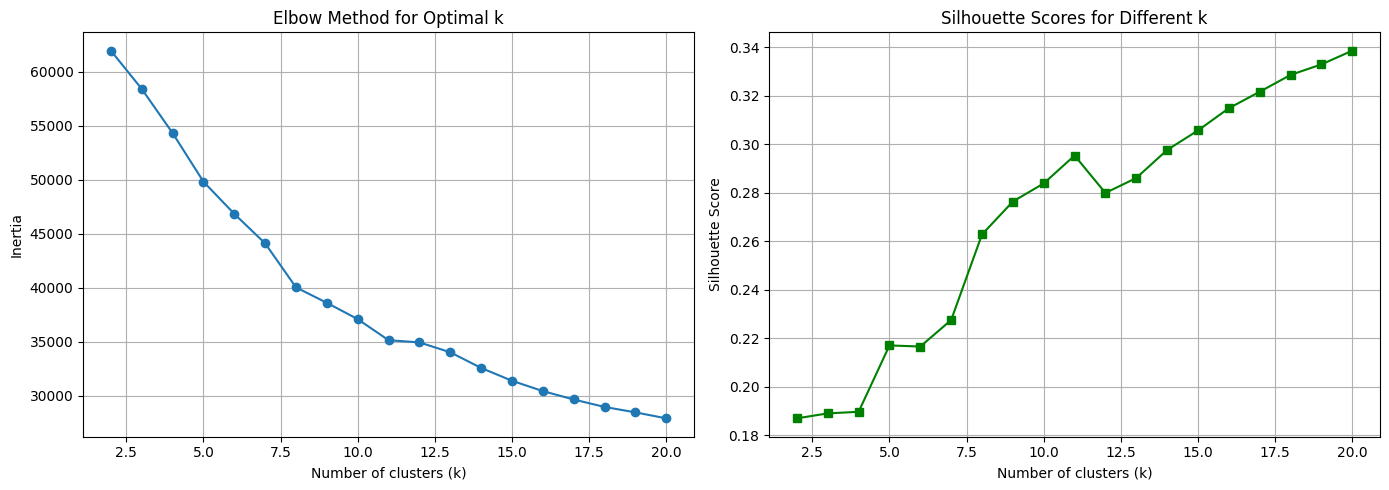

In [11]:
# One-hot encode the genre_list using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_features = mlb.fit_transform(movies['genre_list'])
genre_df = pd.DataFrame(genre_features, columns=mlb.classes_)

# Normalize numerical features
scaler = MinMaxScaler()
numeric_features = scaler.fit_transform(movies[['vote_average', 'popularity']])
numeric_df = pd.DataFrame(numeric_features, columns=['vote_average', 'popularity'])

# Combine genre and numeric features
final_features = pd.concat([genre_df, numeric_df], axis=1)

# Initialize lists for storing scores
inertia_values = []
silhouette_scores = []
k_values = range(2, 21)

# Perform clustering for different values of k
for k in k_values:
    print(f"Training KMeans with k={k}...")
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(final_features)
    inertia_values.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(final_features, kmeans_model.labels_))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(k_values, inertia_values, marker='o')
axs[0].set_title('Elbow Method for Optimal k')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

axs[1].plot(k_values, silhouette_scores, marker='s', color='green')
axs[1].set_title('Silhouette Scores for Different k')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

plt.tight_layout()
plt.show()

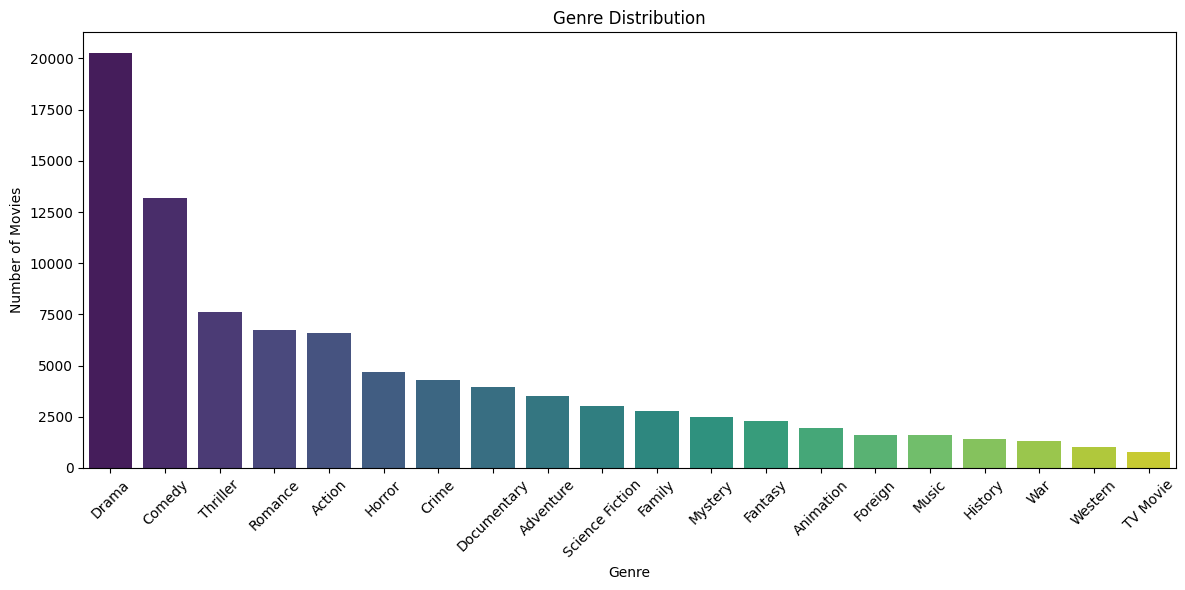

In [29]:
genre_counts = movies['genre_list'].explode().value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='viridis', legend=False)
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

In [14]:
# This turns genre lists into binary features
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movies['genre_list'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

In [15]:
# We scale vote_average and popularity to range [0, 1]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(movies[['vote_average', 'popularity']])
scaled_df = pd.DataFrame(scaled_features, columns=['vote_average', 'popularity'])

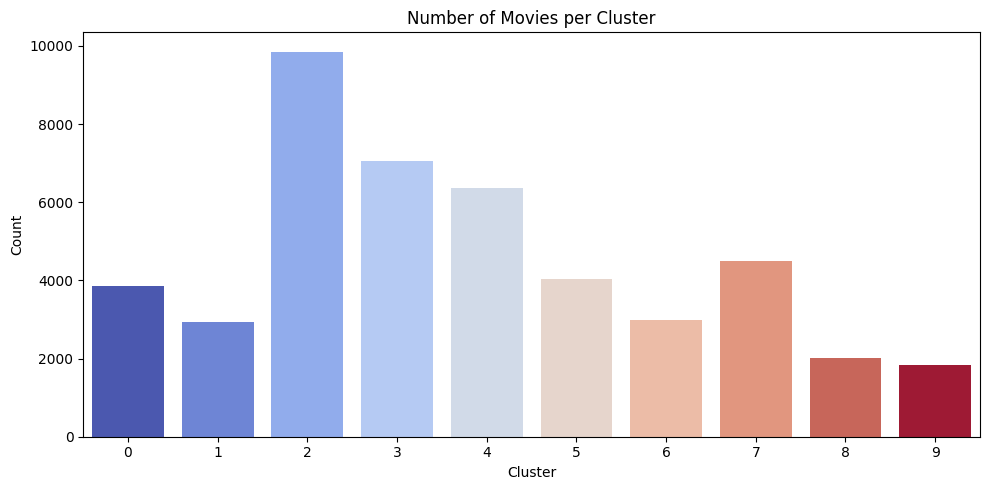

In [27]:
# Fit KMeans using chosen k (replace with optimal k from elbow plot)
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
movies['cluster'] = kmeans.fit_predict(final_features)

# Plot how many movies per cluster
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=movies, hue='cluster', palette='coolwarm', legend=False)
plt.title('Number of Movies per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [38]:
def recommend_movies(movie_title, n=5):
    target = movies[movies['title'].str.lower() == movie_title.lower()]
    if target.empty:
        return f"Movie titled '{movie_title}' not found in dataset."

    cluster_id = target['cluster'].values[0]

    similar_movies = movies[(movies['cluster'] == cluster_id) &
                            (movies['title'].str.lower() != movie_title.lower())].copy()  # <== added .copy()

    similar_movies['score'] = (
        similar_movies['vote_average'] * np.log1p(similar_movies['popularity'])
    )

    return similar_movies[['title', 'vote_average', 'popularity', 'score']].sort_values(
        by='score', ascending=False).head(n)


# Example usage
print("Recommended movies similar to 'Heat':")
print(recommend_movies("Heat", n=5))

Recommended movies similar to 'Heat':
                          title  vote_average  popularity      score
292                Pulp Fiction           8.3  140.950236  41.130455
12481           The Dark Knight           8.3  123.167259  40.019525
43644               Baby Driver           7.2  228.032744  39.123828
314    The Shawshank Redemption           8.5   51.645403  33.690421
834               The Godfather           8.5   41.109264  31.792276
